In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sc
import plotly.express as px

In [2]:
tn = yf.download('^TNX')['Close'].dropna()
sp = yf.download('^GSPC')['Close'].dropna()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
for price in list(set(sp.index).symmetric_difference(set(list(tn.index)))):
    if price in sp:
        del sp[price]
    else:
        del tn[price]

In [4]:
tn_pct = tn.pct_change().dropna()*-1
sp_pct = sp.pct_change().dropna()

In [5]:
seven_day = pd.Series(list(map(lambda i: sc.pearsonr(sp_pct[i-7:i], tn_pct[i-7:i])[0], range(7, len(sp_pct)))), sp_pct.index[7:])
thirty_day = pd.Series(list(map(lambda i: sc.pearsonr(sp_pct[i-30:i], tn_pct[i-30:i])[0], range(30, len(sp_pct)))), sp_pct.index[30:])
ninety_day = pd.Series(list(map(lambda i: sc.pearsonr(sp_pct[i-90:i], tn_pct[i-90:i])[0], range(90, len(sp_pct)))), sp_pct.index[90:])
oneeighty_day = pd.Series(list(map(lambda i: sc.pearsonr(sp_pct[i-180:i], tn_pct[i-180:i])[0], range(180, len(sp_pct)))), sp_pct.index[180:])
threesixty_day = pd.Series(list(map(lambda i: sc.pearsonr(sp_pct[i-360:i], tn_pct[i-360:i])[0], range(360, len(sp_pct)))), sp_pct.index[360:])

/Users/benjamin/Documents/Projects/Code/Python/bond-equity-correlation/.venv/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


<function matplotlib.pyplot.show(close=None, block=None)>

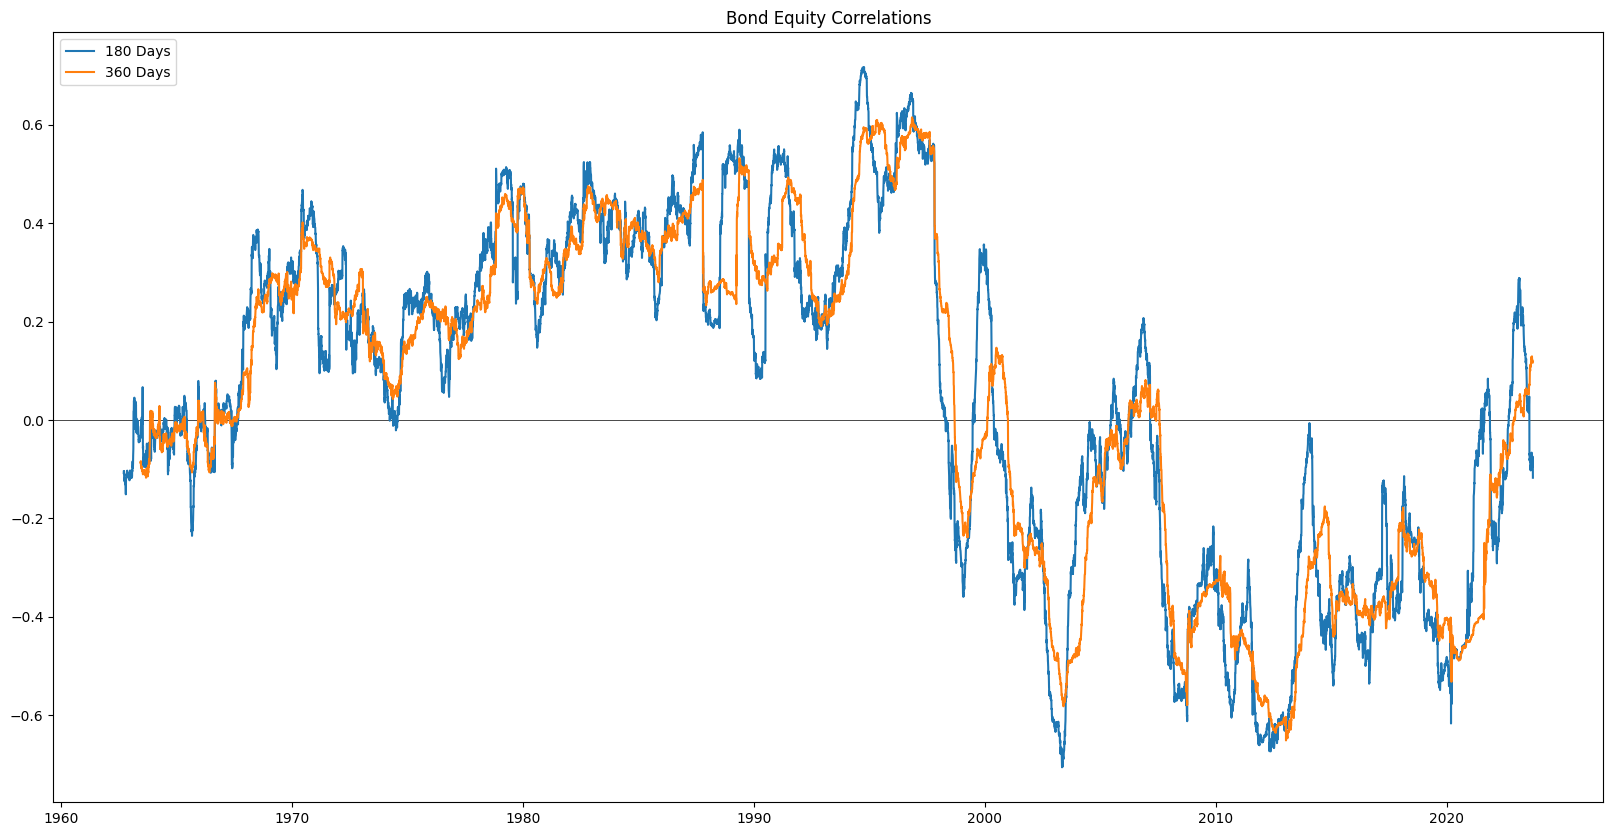

In [6]:
plt.figure(figsize = (20,10))
plt.title('Bond Equity Correlations')
plt.axhline(y = 0, color = 'black', linestyle = '-', lw = 0.5)
# plt.plot(ninety_day, label = '90 Days')
plt.plot(oneeighty_day, label = '180 Days')
plt.plot(threesixty_day, label = '360 Days')
plt.legend(loc = 'upper left')
plt.show

In [7]:
fig = px.line(x = seven_day.index, y = seven_day, labels = dict(x = '', y = ''), title = '') 

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                        label="1m",
                        step="month",
                        stepmode="backward"),
                dict(count=6,
                        label="6m",
                        step="month",
                        stepmode="backward"),
                dict(count=1,
                        label="YTD",
                        step="year",
                        stepmode="todate"),
                dict(count=1,
                        label="1y",
                        step="year",
                        stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

/Users/benjamin/Documents/Projects/Code/Python/bond-equity-correlation/.venv/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [8]:
fig = px.line(x = thirty_day.index, y = thirty_day, labels = dict(x = '', y = ''), title = '') 

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                        label="1m",
                        step="month",
                        stepmode="backward"),
                dict(count=6,
                        label="6m",
                        step="month",
                        stepmode="backward"),
                dict(count=1,
                        label="YTD",
                        step="year",
                        stepmode="todate"),
                dict(count=1,
                        label="1y",
                        step="year",
                        stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

/Users/benjamin/Documents/Projects/Code/Python/bond-equity-correlation/.venv/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

